<a href="https://colab.research.google.com/github/NiteshDhawan/ML/blob/master/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implicit Equation of features. So, we have to apply feature scaling.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv")
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

#We have converted y into 2D hor feature scaling

In [ ]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_2=StandardScaler()

In [ ]:
x=ss.fit_transform(x)
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
y=ss_2.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
#svm means support vector machine
#rbf: Gaussian radial basis function

from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
#Predicting
ss_2.inverse_transform([regressor.predict(ss.transform([[6.5]]))])


array([[170370.0204065]])

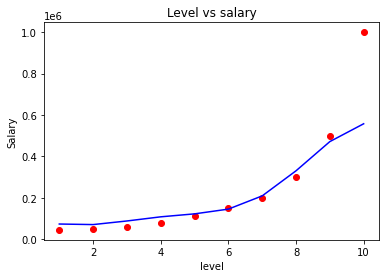

In [ ]:
plt.scatter(ss.inverse_transform(x),ss_2.inverse_transform(y),color='red')
plt.plot(ss.inverse_transform(x),ss_2.inverse_transform(regressor.predict(x).reshape(len(regressor.predict(x)),1)),color='blue')
plt.title("Level vs salary")
plt.xlabel("level")
plt.ylabel("Salary")
plt.show()

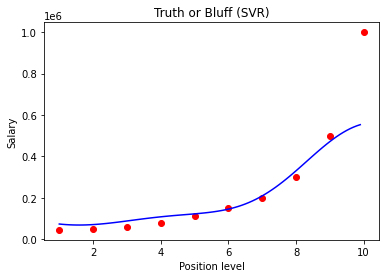

In [ ]:
#More smoother curve


X_grid = np.arange(min(ss.inverse_transform(x)), max(ss.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
k=regressor.predict(ss.transform(X_grid))
plt.scatter(ss.inverse_transform(x), ss_2.inverse_transform(y), color = 'red')
plt.plot(X_grid, ss_2.inverse_transform(k.reshape(len(k),1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()